<a href="https://colab.research.google.com/github/fakehaa/ML-PR/blob/main/ML%26PR_wk5_RPS_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change directory to the folder where the images are stored on google drive
%cd /content/drive/MyDrive/MLPR - Y4T3/Datasets

/content/drive/MyDrive/MLPR - Y4T3/Datasets


In [ ]:
#check the current directory
!pwd

/content/drive/MyDrive/MLPR - Y4T3/Datasets


In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer, Conv2D,MaxPool2D
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path="rps-final-dataset/train"
test_path="rps-final-dataset/test"
val_path="rps-final-dataset/val"

In [ ]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
  sub_path=train_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(64,64))
    x_train.append(img_arr)

In [ ]:
image_path

'rps-final-dataset/train/paper/9bQFlg61mt0akPoM.png'

In [ ]:
x_test=[]
for folder in os.listdir(test_path):
  sub_path=test_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(64,64))
    x_test.append(img_arr)

In [ ]:
x_val=[]
for folder in os.listdir(val_path):
  sub_path=val_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(64,64))
    x_val.append(img_arr)

In [ ]:
# Import the NumPy module
import numpy as np
# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
#x_test, must be divided by 255.0 for normalization.
test_x=test_x/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,target_size = (64, 64), batch_size = 32, class_mode = 'sparse')

Found 1401 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path, target_size = (64, 64), batch_size = 32, class_mode = 'sparse')

Found 266 images belonging to 3 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (64,64), batch_size = 32, class_mode = 'sparse')

Found 350 images belonging to 3 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((1401,), (266,), (350,))

In [ ]:
labels = {value: key for key, value in training_set.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
  print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : paper
1 : rock
2 : scissors


View some sample training images

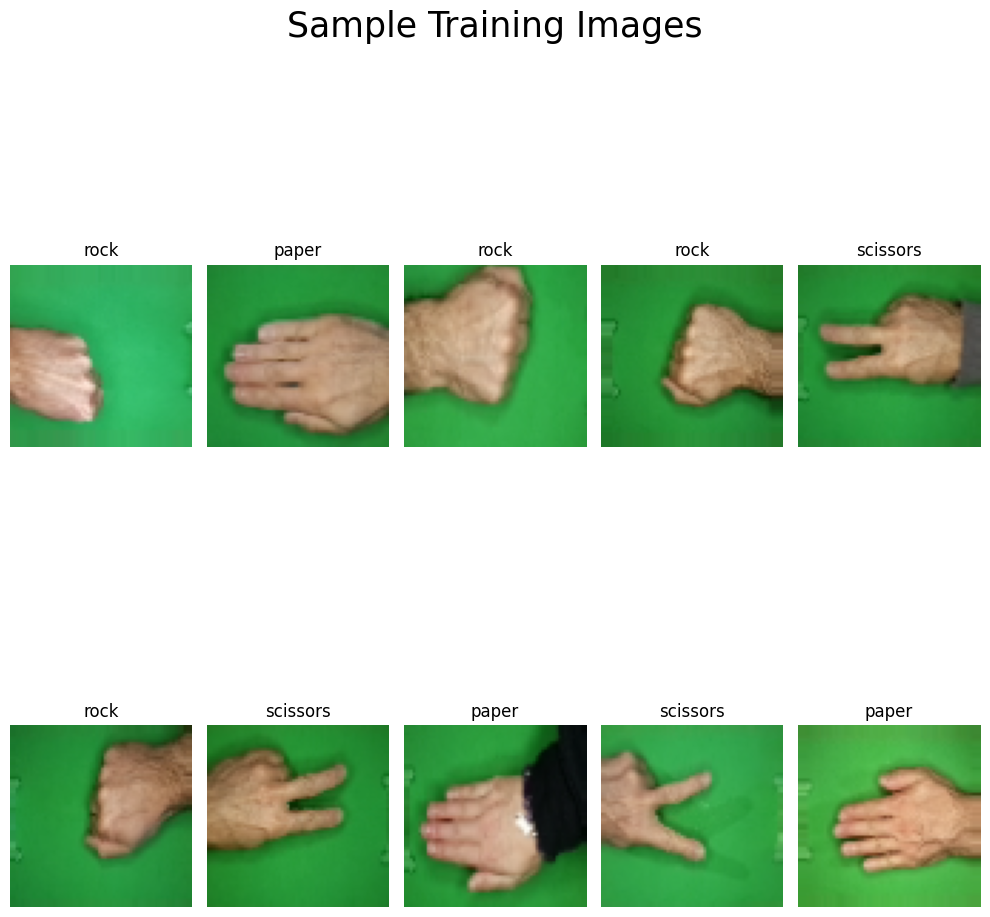

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
  for j in range(5):
    #label = labels[np.argmax(training_set[0][1][idx])]
    label = labels[training_set[0][1][idx]]
    ax[i, j].set_title(f"{label}")
    ax[i, j].imshow(training_set[0][0][idx][:, :, :])
    ax[i, j].axis("off")
    idx += 1
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()

Build the model

In [ ]:
import keras
import tensorflow
print(keras.__version__)
print(tensorflow.__version__)

2.15.0
2.15.0


In [ ]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.InputLayer(input_shape=[64, 64, 3])) #change shape to input_shape
cnn.add(tf.keras.layers.Conv2D(filters=5, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 5)         140       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 5)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        1472      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
model_file = 'best_cnn_model.keras'

In [ ]:
model_check_point = ModelCheckpoint(model_file, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = cnn.fit(
training_set,
validation_data=val_set ,
epochs=10,
callbacks=[early_stopping_monitor, model_check_point],
batch_size=32,shuffle=True)

Epoch 1/10
44/44 [==============================] - ETA: 0s - loss: 1.0303 - accuracy: 0.4968
Epoch 1: val_loss improved from inf to 0.81336, saving model to best_cnn_model.keras
44/44 [==============================] - 22s 472ms/step - loss: 1.0303 - accuracy: 0.4968 - val_loss: 0.8134 - val_accuracy: 0.7514
Epoch 2/10
44/44 [==============================] - ETA: 0s - loss: 0.6461 - accuracy: 0.7666
Epoch 2: val_loss improved from 0.81336 to 0.43437, saving model to best_cnn_model.keras
44/44 [==============================] - 17s 393ms/step - loss: 0.6461 - accuracy: 0.7666 - val_loss: 0.4344 - val_accuracy: 0.8914
Epoch 3/10
44/44 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.8522
Epoch 3: val_loss improved from 0.43437 to 0.30822, saving model to best_cnn_model.keras
44/44 [==============================] - 20s 451ms/step - loss: 0.4241 - accuracy: 0.8522 - val_loss: 0.3082 - val_accuracy: 0.8914
Epoch 4/10
44/44 [==============================] - ETA: 0s

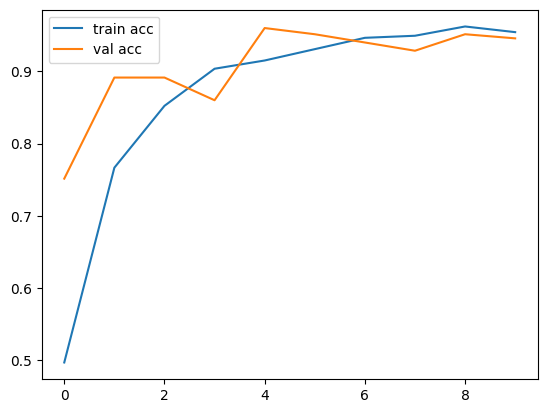

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
# Plot the accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

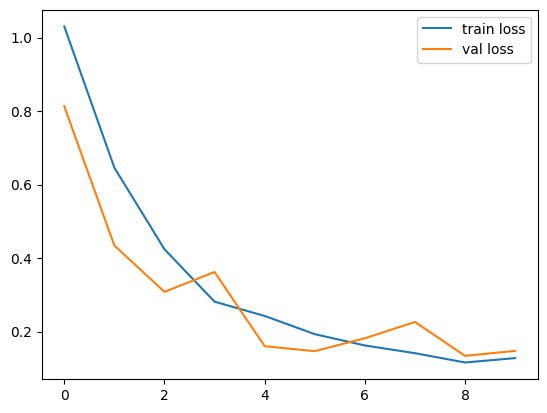

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('best_cnn_model.keras')

In [ ]:
# Evaluate the model on the test data
model.evaluate(test_set, batch_size=32)

9/9 [==============================] - 2s 213ms/step - loss: 0.1335 - accuracy: 0.9624


[0.13354060053825378, 0.9624060392379761]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred, test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

9/9 [==============================] - 1s 60ms/step
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        79
           1       1.00      0.78      0.88       185
           2       0.00      0.00      0.00         2

    accuracy                           0.84       266
   macro avg       0.55      0.59      0.56       266
weighted avg       0.89      0.84      0.85       266

[[ 79   0   0]
 [ 40 145   0]
 [  2   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions = model.predict(test_x)

9/9 [==============================] - 0s 34ms/step


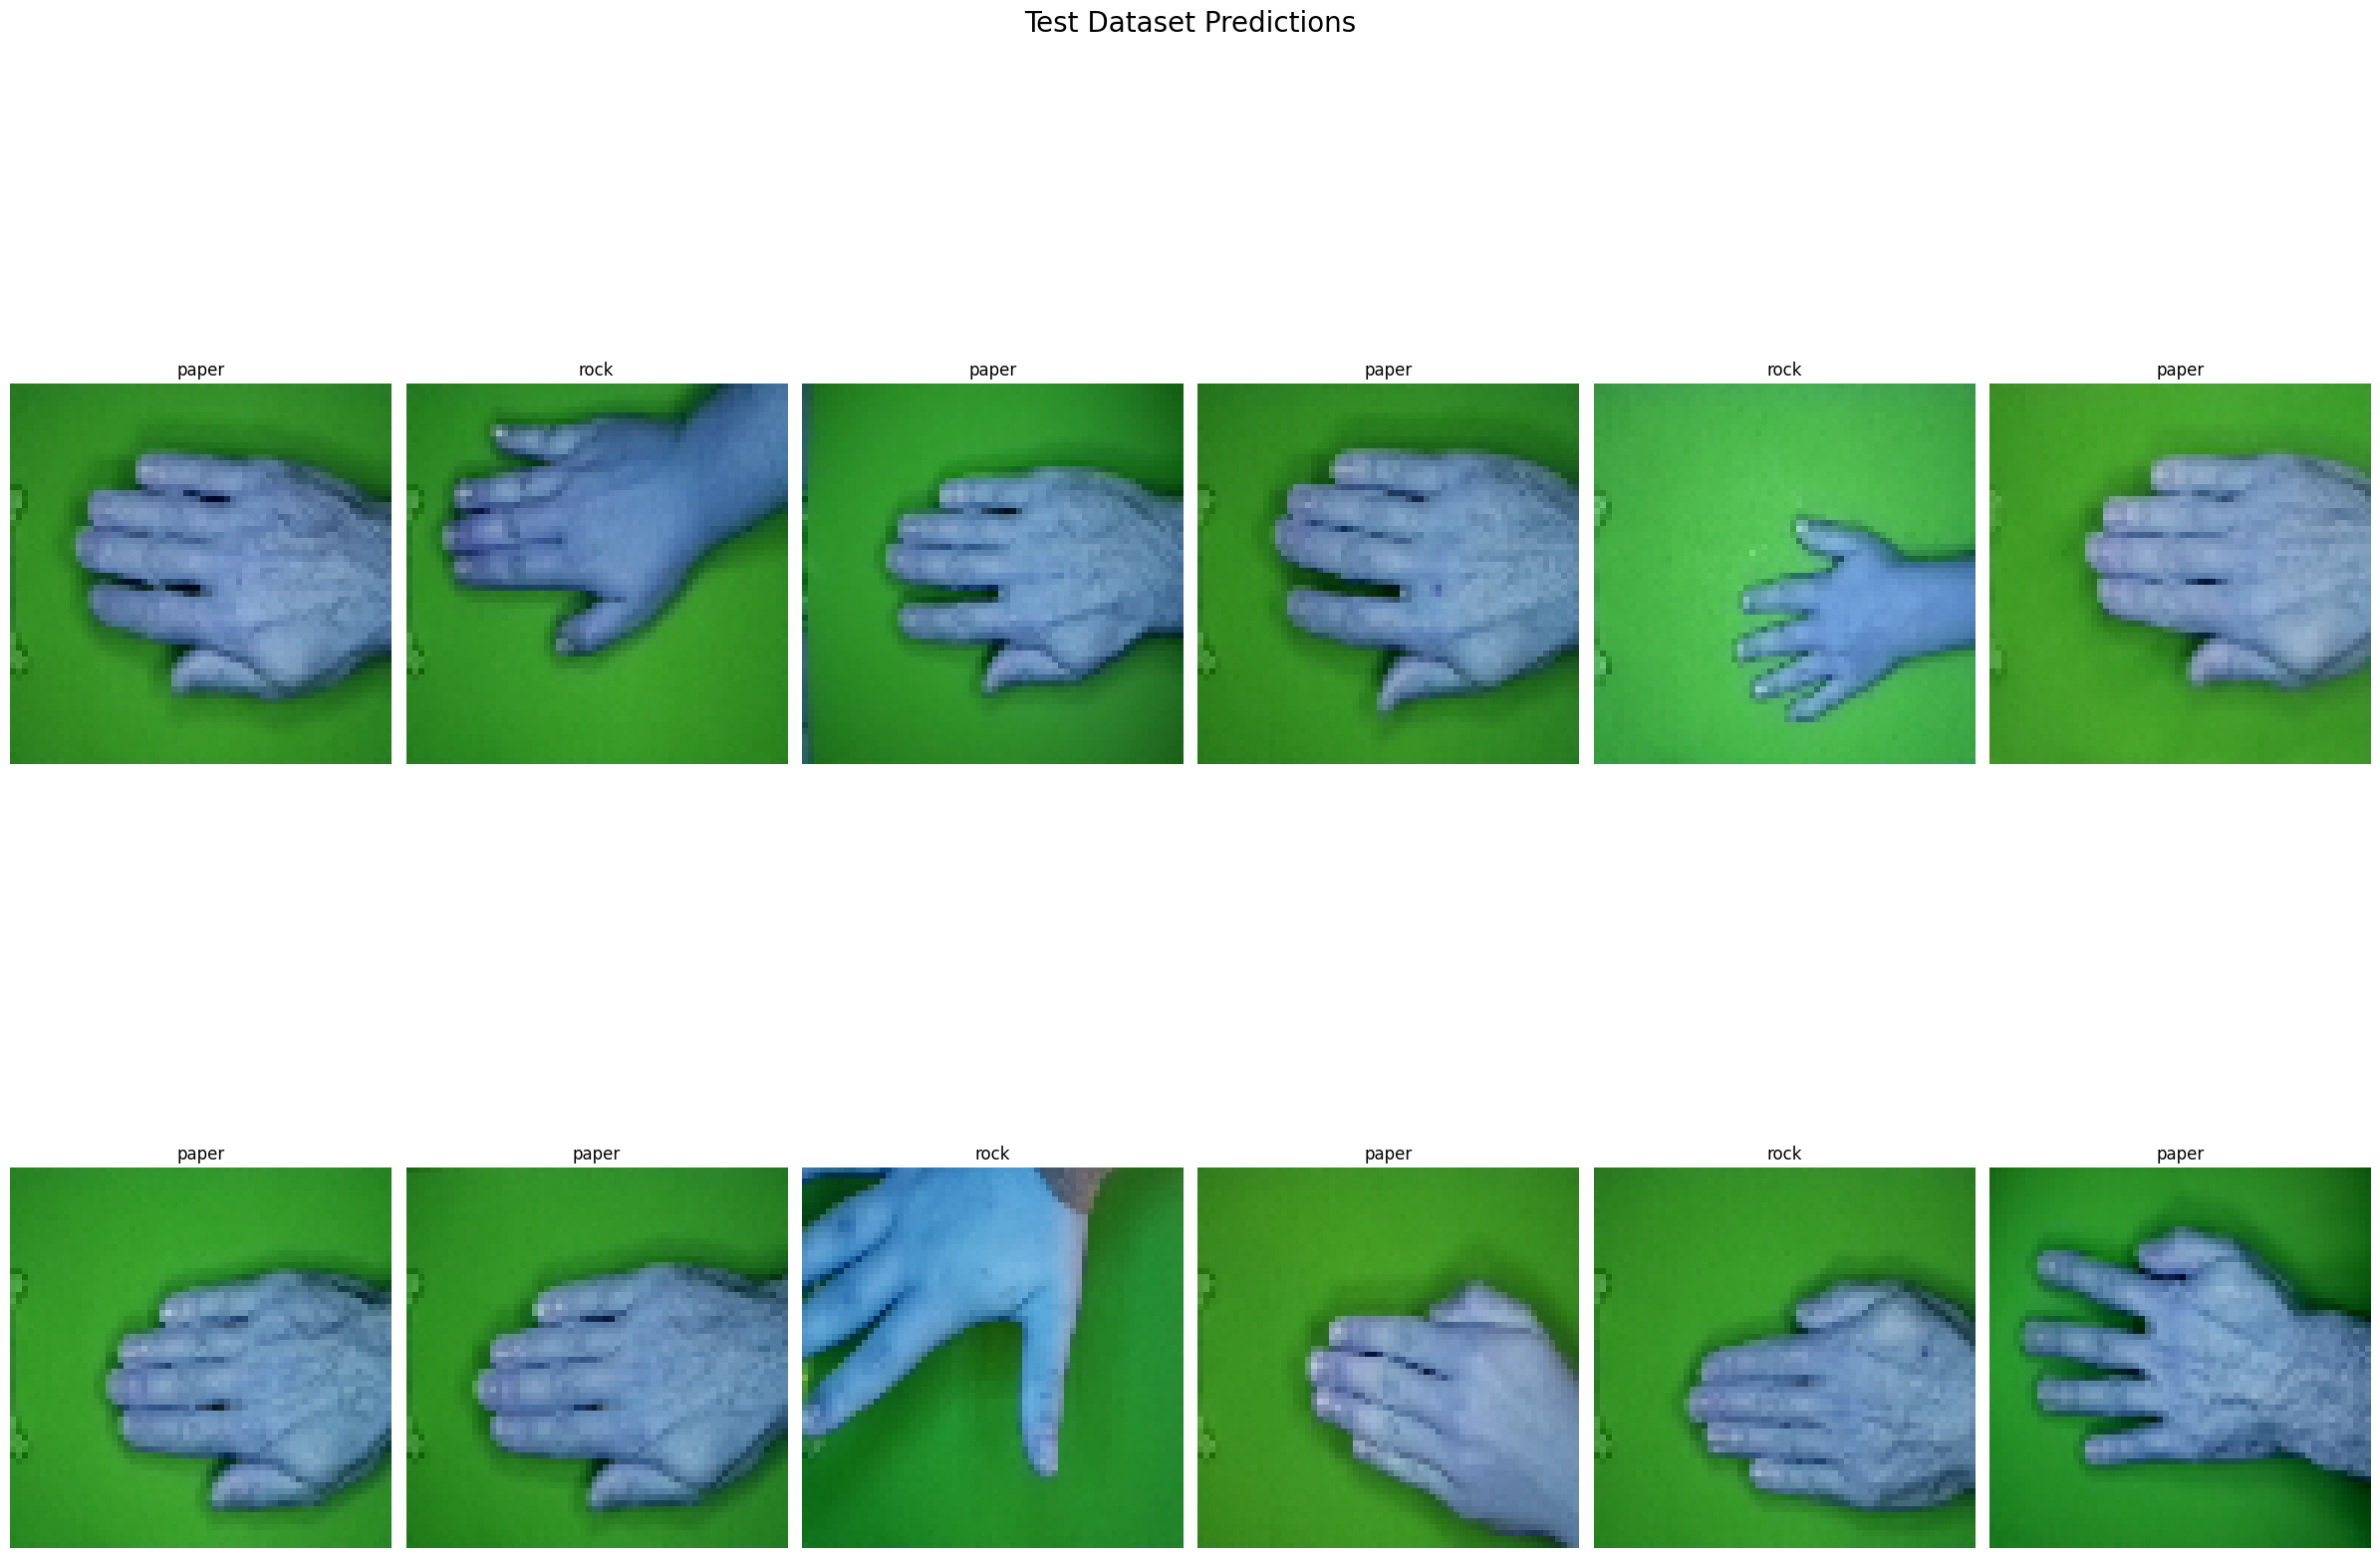

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 20))
idx = 100
for i in range(2):
  for j in range(6):
    predicted_label = labels[np.argmax(predictions[idx])]
    ax[i, j].set_title(f"{predicted_label}")
    ax[i, j].imshow(test_x[idx])
    ax[i, j].axis("off")
    idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()